# Machine Learning in Python - Project 1

Due Friday, March 6th by 5 pm.

*include contributors names here*

## 0. Setup

In [1]:
# Install required packages
!pip install -q -r requirements.txt

In [2]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [4]:
# Load data
d = pd.read_csv("the_office.csv")
d

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,Matt Sohn,Dan Sterling,8.0,1484,2013-04-11,273,59,2965,24,Andy;Angela;Creed;Dwight;Erin;Jim;Kevin;Meredi...
182,9,20,Paper Airplane,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,2013-04-25,234,48,2564,27,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
183,9,21,Livin' the Dream,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,2013-05-02,382,33,4333,20,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,4965,30,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...


## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        186 non-null    int64  
 1   episode       186 non-null    int64  
 2   episode_name  186 non-null    object 
 3   director      186 non-null    object 
 4   writer        186 non-null    object 
 5   imdb_rating   186 non-null    float64
 6   total_votes   186 non-null    int64  
 7   air_date      186 non-null    object 
 8   n_lines       186 non-null    int64  
 9   n_directions  186 non-null    int64  
 10  n_words       186 non-null    int64  
 11  n_speak_char  186 non-null    int64  
 12  main_chars    186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


In [9]:
numeric_variables = ["season", "episode", "imdb_rating", "total_votes", 
                     "n_lines", "n_directions", "n_words", "n_speak_char"]
integer_variables = ["season", "episode", "total_votes", 
                    "n_lines", "n_directions", "n_words", "n_speak_char"]
float_variables = ["imdb_rating"]
object_variables = ["episode_name", "director", "writer", "air_date", "main_chars"]

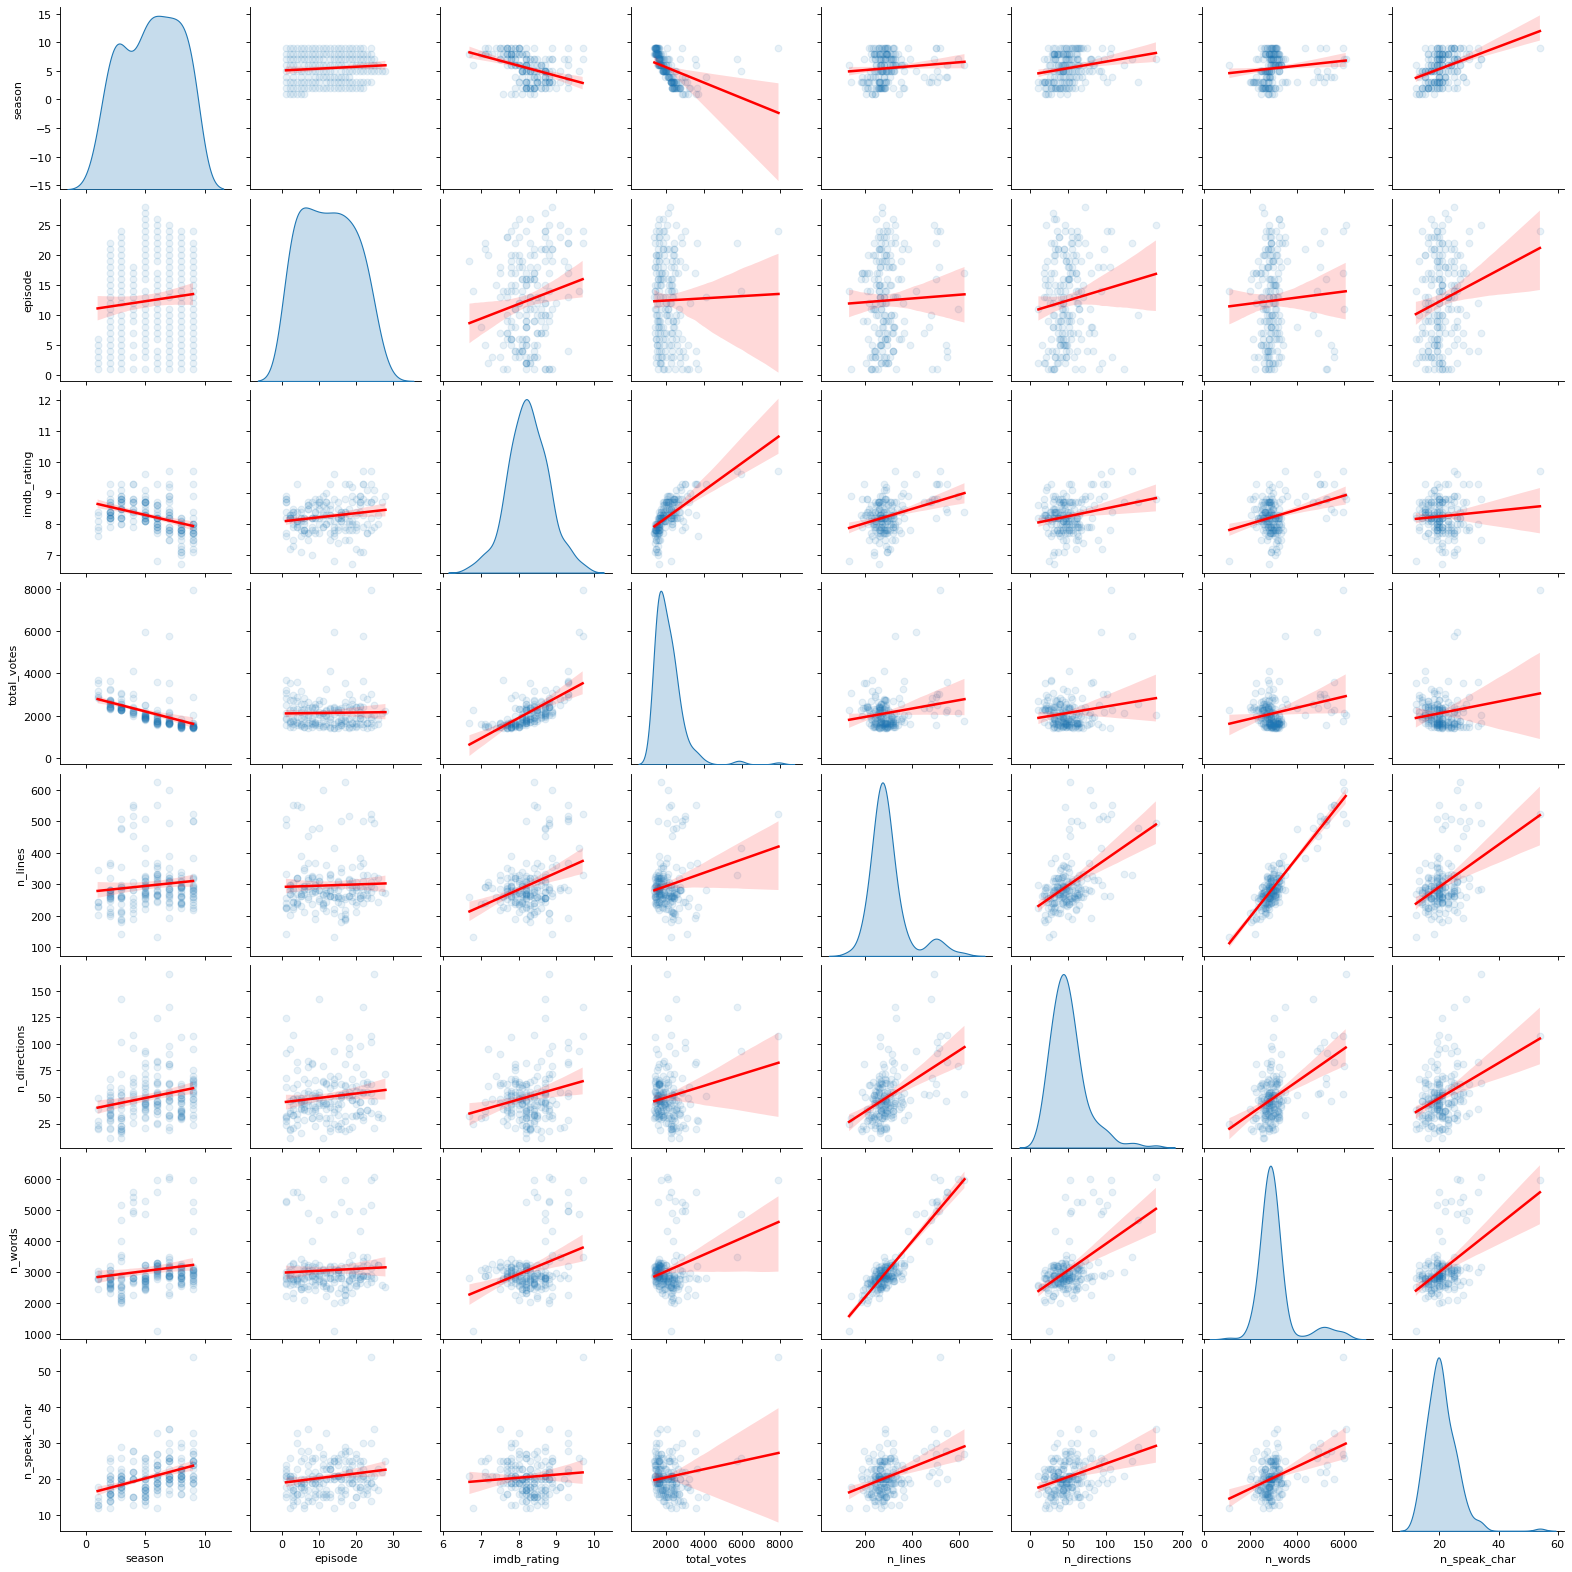

In [11]:
# create pairplot for numeric variables
sns.pairplot(d, vars = numeric_variables, kind = "reg", diag_kind = "kde", 
            plot_kws = {'line_kws': {'color' : 'red'}, 'scatter_kws' : {'alpha' : 0.1}})
plt.show()

In [12]:
correlation = d.corr();correlation

,season,episode,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char
season,1.000000,0.098716,-0.397731,-0.444398,0.115649,0.228935,0.146717,0.413508
episode,0.098716,1.000000,0.179985,0.020161,0.034908,0.125925,0.055552,0.184197
imdb_rating,-0.397731,0.179985,1.000000,0.653973,0.348994,0.226286,0.337212,0.091992
total_votes,-0.444398,0.020161,0.653973,1.000000,0.205062,0.182462,0.265325,0.178324
n_lines,0.115649,0.034908,0.348994,0.205062,1.000000,0.487551,0.915959,0.416188
n_directions,0.228935,0.125925,0.226286,0.182462,0.487551,1.000000,0.511985,0.350052
n_words,0.146717,0.055552,0.337212,0.265325,0.915959,0.511985,1.000000,0.480967
n_speak_char,0.413508,0.184197,0.091992,0.178324,0.416188,0.350052,0.480967,1.000000


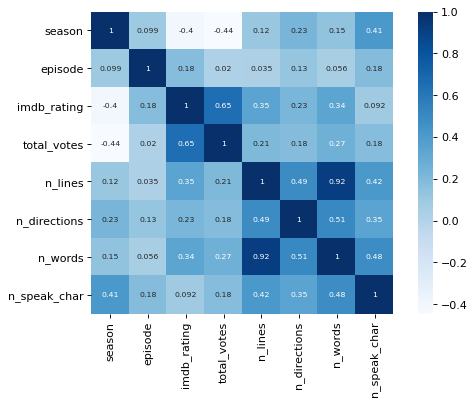

In [14]:
# use correaltionship coefficients matrix below to create a heat map
sns.heatmap(correlation, cbar = True, square = True, annot = True, annot_kws = {'size' : 7}, cmap = 'Blues')
plt.show()

In [17]:
def more_plots(variable_name):
    """
    Input: 
        variable_name: the variable from data set "d"
        
    Output:
        four diagrams, KDE plots and QQ-plots for original data and data with log transformation
        
    Example:
        more_plots("total_votes")
    """
    plt.figure(figsize = (12, 4))
    plt.subplot(2, 2, 1)
    sns.distplot(d[variable_name], fit = stats.norm);
    plt.subplot(2, 2, 2)
    _ = stats.probplot(d[variable_name], plot = plt)
    plt.subplot(2, 2, 3)
    sns.distplot(np.log(d[variable_name]), fit = stats.norm);
    plt.subplot(2, 2, 4)
    _ = stats.probplot(np.log(d[variable_name]), plot = plt)

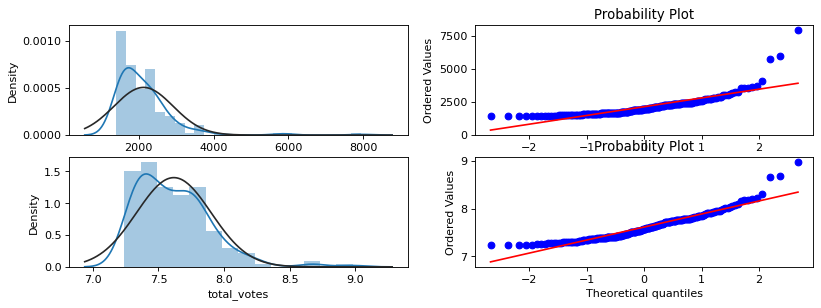

In [28]:
from scipy import stats
# head the warnings
import warnings
warnings.filterwarnings("ignore")
more_plots("total_votes")
plt.show()

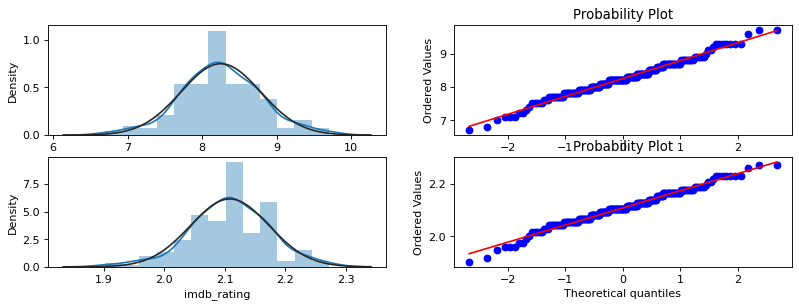

In [29]:
more_plots("imdb_rating")
plt.show()

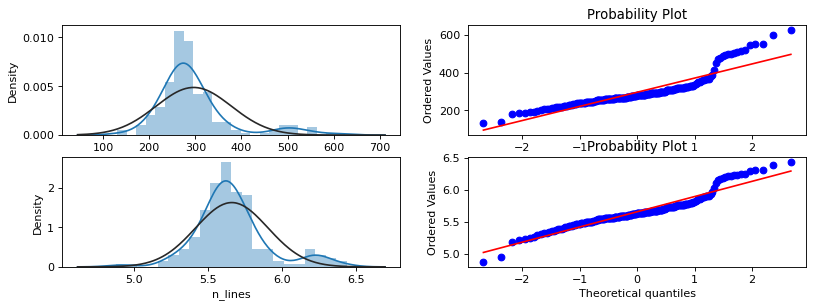

In [30]:
more_plots("n_lines")
plt.show()

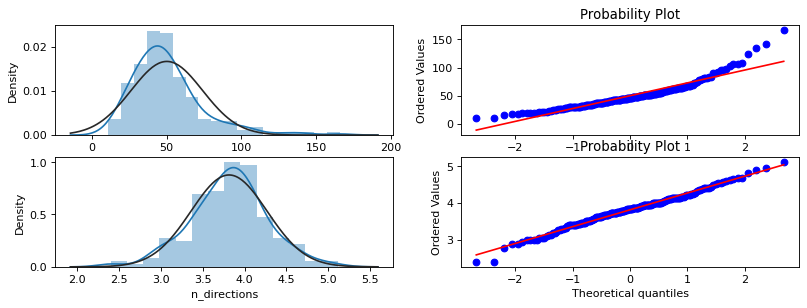

In [31]:
more_plots("n_directions")
plt.show()

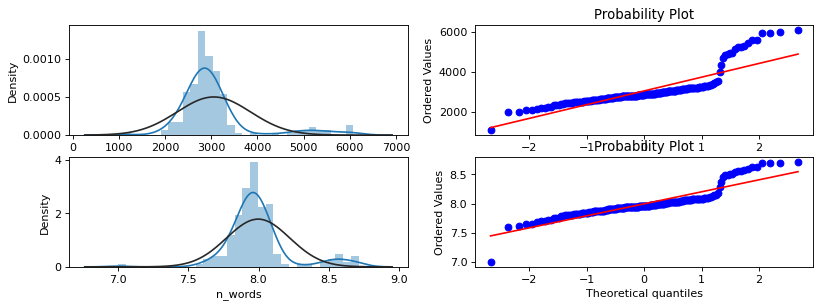

In [32]:
more_plots("n_words")
plt.show()

In [5]:
# Categorical variables
episode_name = d["episode_name"];episode_name

0                 Pilot
1         Diversity Day
2           Health Care
3          The Alliance
4            Basketball
             ...       
181       Stairmageddon
182      Paper Airplane
183    Livin' the Dream
184             A.A.R.M
185              Finale
Name: episode_name, Length: 186, dtype: object

In [6]:
director = d["director"];director

0           Ken Kwapis
1           Ken Kwapis
2      Ken Whittingham
3         Bryan Gordon
4         Greg Daniels
            ...       
181          Matt Sohn
182       Jesse Peretz
183      Jeffrey Blitz
184       David Rogers
185         Ken Kwapis
Name: director, Length: 186, dtype: object

In [7]:
writer = d["writer"];writer

0      Ricky Gervais;Stephen Merchant;Greg Daniels
1                                       B.J. Novak
2                                 Paul Lieberstein
3                                    Michael Schur
4                                     Greg Daniels
                          ...                     
181                                   Dan Sterling
182            Halsted Sullivan;Warren Lieberstein
183                          Nicki Schwartz-Wright
184                                Brent Forrester
185                                   Greg Daniels
Name: writer, Length: 186, dtype: object

In [8]:
main_chars = d["main_chars"];main_chars

0      Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1      Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2      Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3      Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4      Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...
                             ...                        
181    Andy;Angela;Creed;Dwight;Erin;Jim;Kevin;Meredi...
182    Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
183    Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
184    Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
185    Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
Name: main_chars, Length: 186, dtype: object

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a NBC Universal executive who is with the show and  university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

## 5. Convert Document

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to markdown project1.ipynb